# Final Project: Social Graph & Data Management

Authors: Pablo Mollá, Pavlo Poliuha and Junjie Chen

## Dataset Explanation: Bitcoin OTC Trust-Weighted Signed Network $\textcolor{lime}{\checkmark}$

$\textbf{Dataset URL}$: [Bitcoin OTC Trust-Weighted Signed Network](http://snap.stanford.edu/data/soc-sign-bitcoin-otc.html)

### 1. Introduction to Bitcoin OTC

$\textcolor{lime}{\text{Bitcoin}}$ is a decentralized digital currency where transactions happen directly between users without intermediaries. However, Bitcoin users are often anonymous. This anonymity, while powerful, can also make transactions risky since there’s no built-in way to evaluate if someone is trustworthy. To solve this, $\textcolor{lime}{\text{Bitcoin OTC (Over-the-Counter)}}$ platforms emerged, where people trade Bitcoin in private and rate others to maintain a reputation system.

### 2. What is OTC Trading?

$\textcolor{lime}{\text{Over-the-Counter (OTC)}}$ trading is a private method for buying or selling Bitcoin and other cryptocurrencies without using public exchanges, like [Binance](https://www.binance.com/es) or [Coinbase](https://www.coinbase.com/en-fr) where trades are visible to everyone and prices fluctuate based on supply and demand. Unlike public exchanges, $\textcolor{lime}{\text{OTC trading}}$ is:
  - **Private:** Transactions occur directly between buyers and sellers.
  - **Customizable:** Traders can negotiate deals based on their preferences.
  - **Discreet:** Details remain confidential, reducing market influence.
  
For instance, imagine Alice wants to sell 10 Bitcoins, but public exchanges don’t offer favorable rates or the liquidity she needs. She can use an OTC platform to find Bob, who wants to buy the same amount, and they agree on a price privately.

### 3. The Bitcoin OTC Network

The Dataset we have chosen is the $\textcolor{lime}{\text{Bitcoin OTC Network}}$ is a who-trusts-whom system where users can $\textcolor{cyan}{\text{rate other users}}$ they trade with on a scale of $\textcolor{red}{\text{-10 (total distrust)}}$ to $\textcolor{teal}{\text{+10 (total trust)}}$. This is truly important as ratings help build trust and avoid fraudulent users in an anonymous trading environment in the free market.


The $\textcolor{lime}{\text{Bitcoin OTC Network}}$ can be represented as a $\textcolor{cyan}{\text{directed and weighted graph}}$, where:
    - **Nodes** represent users.
    - **Edges** represent trust ratings between users.
    - **Weights** on edges show the level of trust or distrust.

For instance:
- If Alice rates Bob with **+8**, there’s an edge from Alice → Bob with weight 8.
- If Bob distrusts Charlie and rates him **-5**, there’s an edge from Bob → Charlie with weight -5.

### 4. Why Study the Bitcoin OTC Network?


We found interesting this dataset due to the following reasons and personal financial interests:
- **Understanding Trust Patterns:** Analyzing how trust is distributed in the network can reveal insights into trading behavior.
- **Preventing Fraud:** Detecting anomalies or clusters of distrust can help identify risky users.
- **Community Dynamics:** Exploring how trust propagates or clusters in the network helps us understand how communities form in anonymous settings.

The $\textcolor{lime}{\text{Bitcoin OTC Network}}$ provides a real-world application of trust mechanisms in anonymous environments. By using tools like trust ratings and network analysis, it helps users make informed decisions and enables safer trades in the decentralized world of cryptocurrencies.

## Libraries

In [126]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Data Loading $\textcolor{lime}{\checkmark}$

In [127]:
# Load data into a DataFrame (TSV format)
df = pd.read_csv('/Users/pablomollacharlez/Desktop/M2_DS/soc-sign-bitcoinotc.csv', sep=",")

# Inspect the data
print(df.head())
print(df.info())

   SOURCE  TARGET  RATING          TIME
0       6       2       4  1.289242e+09
1       6       5       2  1.289242e+09
2       1      15       1  1.289243e+09
3       4       3       7  1.289245e+09
4      13      16       8  1.289254e+09
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35592 entries, 0 to 35591
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SOURCE  35592 non-null  int64  
 1   TARGET  35592 non-null  int64  
 2   RATING  35592 non-null  int64  
 3   TIME    35592 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 1.1 MB
None


## Graph Creation $\textcolor{lime}{\checkmark}$

In [128]:
# Create a directed graph
graph = nx.from_pandas_edgelist(
    df, 
    source='SOURCE', 
    target='TARGET', 
    create_using=nx.DiGraph()
)

## $\textcolor{teal}{\text{Question 1}}$: Show the number of nodes and edges in the graph. $\textcolor{lime}{\checkmark}$

In [129]:
# Printing basic statistics: Number of Nodes + Edges
print(f"Number of nodes: {graph.number_of_nodes()}")
print(f"Number of edges: {graph.number_of_edges()}")

Number of nodes: 5881
Number of edges: 35592


## $\textcolor{teal}{\text{Question 2}}$: Draw the graph. $\textcolor{lime}{\checkmark}$

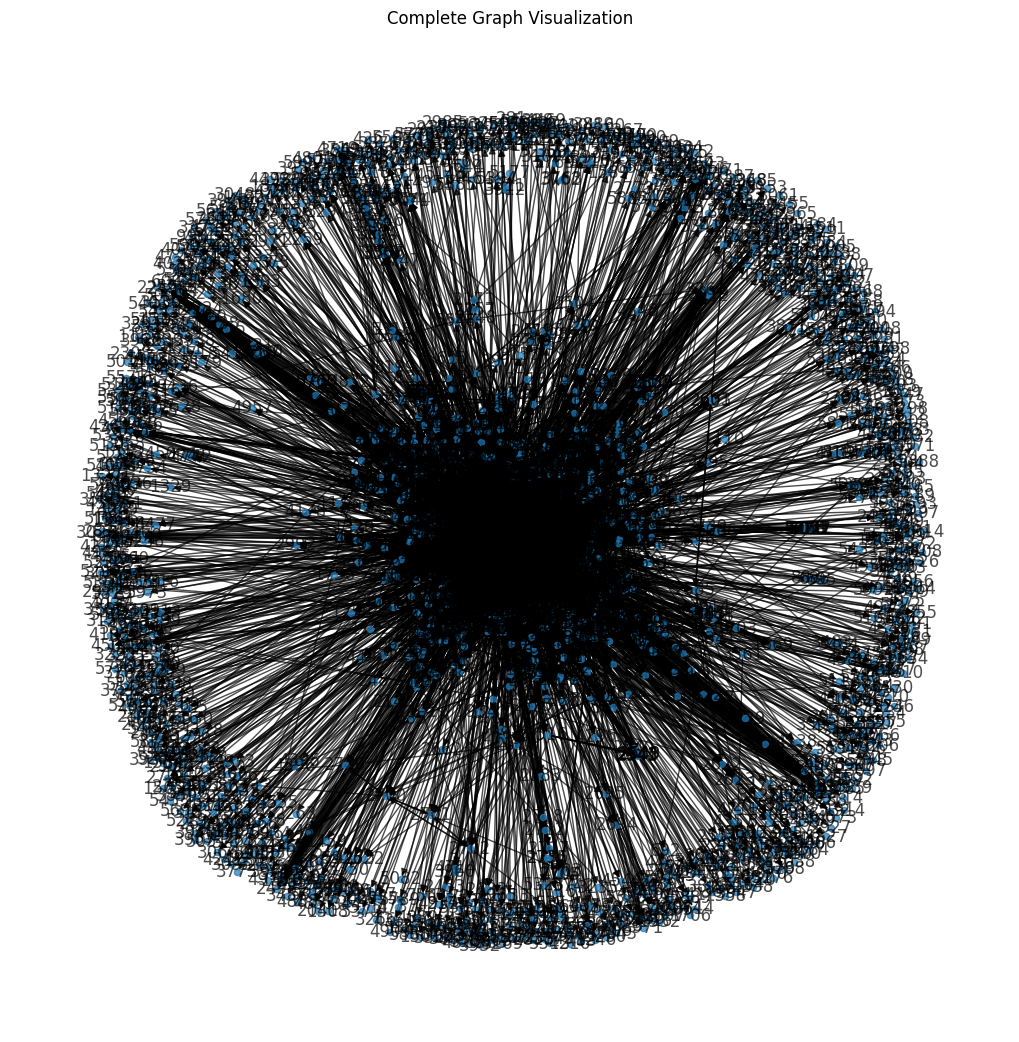

In [165]:
plt.figure(figsize=(10, 10))
nx.draw(graph, with_labels=True, node_size=20, alpha=0.7)
plt.title("Complete Graph Visualization")
plt.show()


## $\textcolor{teal}{\text{Question 3}}$: Draw the histogram of degrees. Compare the distribution with the distribution for a random graph having the same average degree. Discuss the results. $\textcolor{lime}{\checkmark}$

### 3.1 Histogram of Degrees of the Bitcoin OTC Network

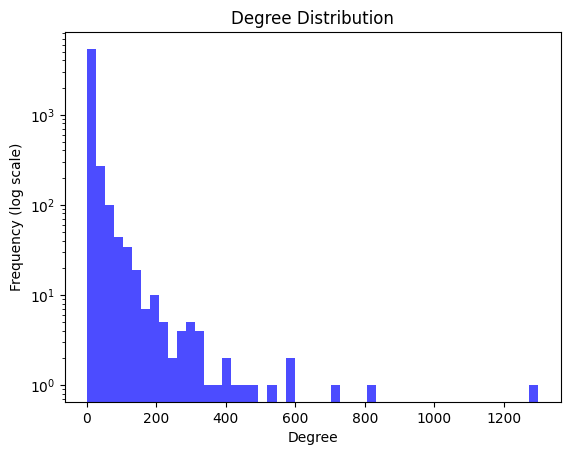

In [131]:
# Degree histogram
degrees = [deg for _, deg in graph.degree()]
plt.hist(degrees, bins=50, log=True, color='blue', alpha=0.7)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency (log scale)')
plt.show()

### 3.2 Random Graph Distribution

To answer this question, we will consider the 2 possible random graphs studied in the lecture, which consist in the $\textcolor{cyan}{\text{two primary variants}}$ of the $\textcolor{magenta}{\text{ER model}}$:

- $\textcolor{cyan}{\text{G(N, p) Model}}$ ($\textbf{Type 1}$): A graph with $N$ nodes where each possible edge is included independently with probability $p$.
- $\textcolor{cyan}{\text{G(N, L) Model}}$ ($\textbf{Type 2}$): A graph with $N$ nodes and exactly $L$ edges, where the $L$ edges are chosen uniformly at random from all possible pairs.


#### 3.2.1 Type 1: $\textcolor{cyan}{\text{G(N, p) Model}}$

In order to generate this type of random graph, we will need to compute the average degree of the original graph, and then can compute the $\textcolor{orange}{\text{probability}}$ as:
$$
    p = \frac{\langle k \rangle}{N-1}
$$

##### A. Average Degree

In [132]:
# Computin the average degree of the original graph
total_degree = sum(dict(graph.degree()).values())
num_nodes = graph.number_of_nodes()
average_degree = total_degree / num_nodes
print(f"Average Degree: {average_degree}")

Average Degree: 12.104063934704982


##### B. Probability & Random Graph Creation (T1)

In [133]:
# Compute probability p
p = average_degree / (num_nodes - 1)
print(f"Probability p: {p}")

# Generate the ER graph
random_graph_p = nx.erdos_renyi_graph(n=num_nodes, p=p)

Probability p: 0.002058514274609691


##### C. Histogram of Random Graph (T1)

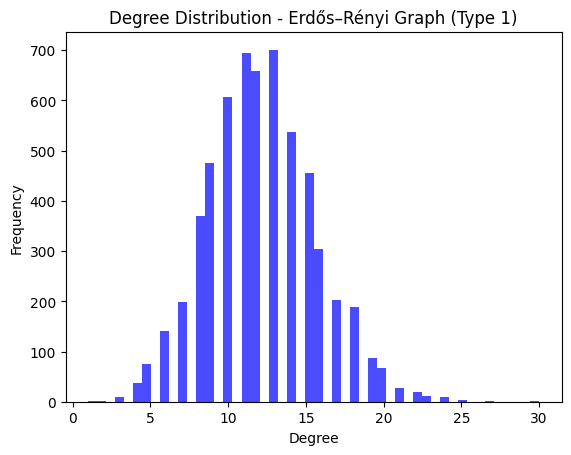

In [134]:
# Degree distribution for Type 1 (ER graph)
random_degrees_p = [deg for _, deg in random_graph_p.degree()]
plt.hist(random_degrees_p, bins=50, color='blue', alpha=0.7)
plt.title("Degree Distribution - Erdős–Rényi Graph (Type 1)")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

#### 3.2.2 $\textbf{Type 2}$: $\textcolor{cyan}{\text{G(N, L) Model}}$

In this scenario, we just need to consider the total number of nodes and edges, and the random graph will be generated by chosing uniformly at random the edges.

##### A. Random Graph Creation (T2)

In [135]:
# Number of edges in the original graph
num_edges = graph.number_of_edges()
print(f"Number of edges: {num_edges}")

# Generate the random graph with exactly L edges
random_graph_L = nx.gnm_random_graph(n=num_nodes, m=num_edges)

Number of edges: 35592


##### B. Histogram of Random Graph (T2)

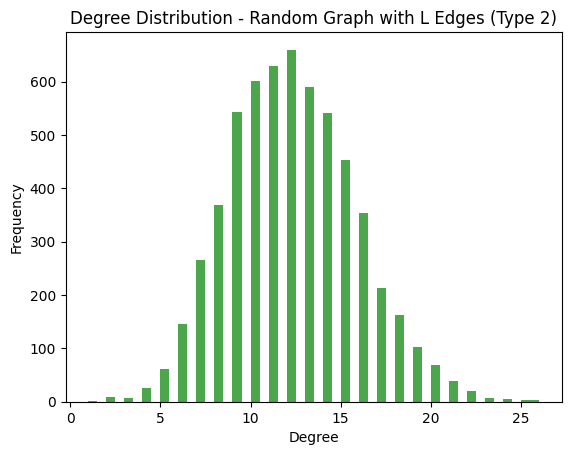

In [136]:
# Degree distribution for Type 2 (Graph with L edges)
random_degrees_L = [deg for _, deg in random_graph_L.degree()]
plt.hist(random_degrees_L, bins=50, color='green', alpha=0.7)
plt.title("Degree Distribution - Random Graph with L Edges (Type 2)")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

### 3.3 Discussion of results

Let's discuss the three histograms we have obtained which represent different types of graphs, each with a distinct degree distribution:

1. $\textcolor{lime}{\text{Bitcoin OTC Trust Weighted Network (Original Graph)}}$: This histogram clearly shows a $\textcolor{blue}{\text{scale-free network}}$ typically observed in real-world networks such as Bitcoin's OTC trust-weighted network. It follows a **heavy-tailed distribution**, where most nodes have a low degree (few connections - common users), but there is a small number of nodes with very high degrees (many connections - highly trusted users), i.e. the degree distribution is **skewed** toward low values, with a few nodes having disproportionately high degrees.

2. $\textcolor{cyan}{\text{Erdős–Rényi Graph (Type 1)}}$: This graph follows the $\textcolor{cyan}{\text{G(N, p) model}}$, where each edge is independently added between nodes with a fixed probability, resulting in a **binomial degree distribution**. The histogram shows a **normal-like distribution** of node degrees around an average value ($\textcolor{orange}{\langle k \rangle = 12.10}$ in our case). The spread is relatively symmetrical, indicating that most nodes have a degree around the average, with few nodes at the extreme ends of the degree range. This is quite different from the $\textcolor{lime}{\text{Bitcoin OTC trust network}}$, which has a **heavy-tailed** distribution, meaning the majority of nodes are not concentrated around a single average degree but spread out with a few nodes being highly connected.

3. $\textcolor{cyan}{\text{Erdős–Rényi Graph (Type 2)}}$:: This graph follows the $\textcolor{cyan}{\text{G(N, L) model}}$, where the total number of edges, $L$, is fixed, and edges are randomly chosen. The degree distribution looks similar to that of the $\textcolor{cyan}{\text{Erdős–Rényi model (Type 1)}}$, but with some deviations. It also shows a **normal-like distribution**, though there may be slight variations in the tails depending on the exact configuration of nodes and edges. This distribution is **more uniform** compared to the Bitcoin OTC network.


## $\textcolor{teal}{\text{Question 4}}$: Draw the histogram of clustering coefficient, and the average clustering coefficient. Compare it with the one of a random graph and discuss the results. $\textcolor{lime}{\checkmark}$

### 4.1 Histogram of Clustering Coefficient of Bitcoin OTC Network

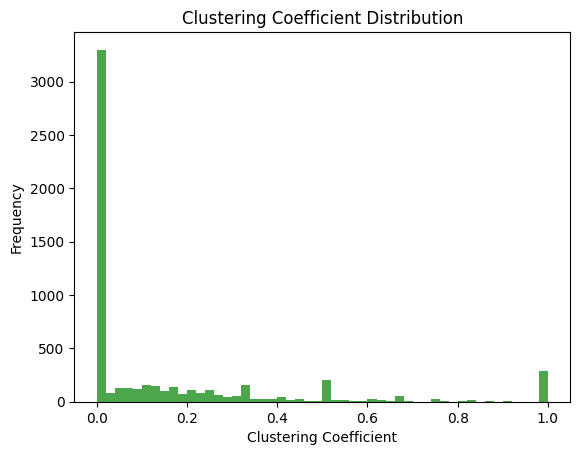

In [137]:
# Clustering coefficient
clustering_coeffs = list(nx.clustering(graph).values())
plt.hist(clustering_coeffs, bins=50, color='green', alpha=0.7)
plt.title("Clustering Coefficient Distribution")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.show()

### 4.2 Average Clustering Coefficient of Bitcoin OTC Network

In [138]:
# Average clustering coefficient
avg_clustering = nx.average_clustering(graph)
print(f"Average Clustering Coefficient Bitcoin OTC Network: {avg_clustering}")

Average Clustering Coefficient Bitcoin OTC Network: 0.1510698055090718


### 4.3 Random Graph's Clustering Coefficient (Type 1 and 2)

#### 4.3.1 Type 1: $\textcolor{cyan}{\text{G(N, p) Model}}$

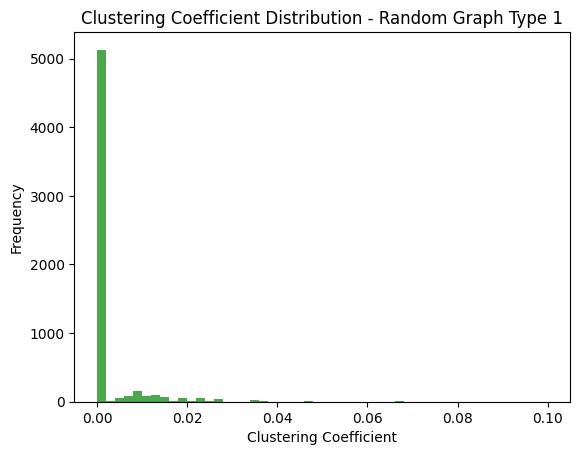

In [139]:
# Clustering coefficient
clustering_coeffs = list(nx.clustering(random_graph_p).values())
plt.hist(clustering_coeffs, bins=50, color='green', alpha=0.7)
plt.title("Clustering Coefficient Distribution - Random Graph Type 1")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.show()

#### 4.3.2 Type 2: $\textcolor{cyan}{\text{G(N, L) Model}}$

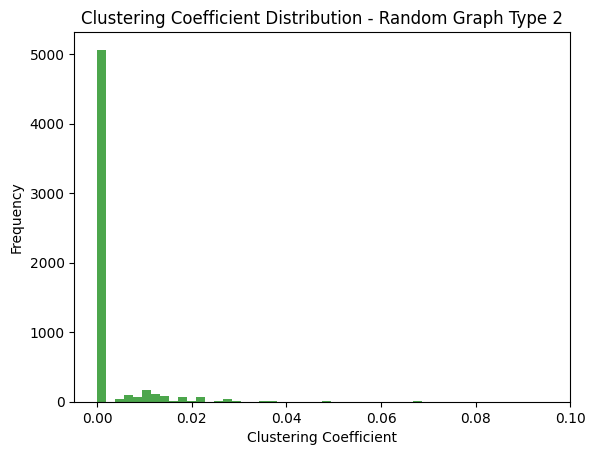

In [140]:
# Clustering coefficient
clustering_coeffs = list(nx.clustering(random_graph_L).values())
plt.hist(clustering_coeffs, bins=50, color='green', alpha=0.7)
plt.title("Clustering Coefficient Distribution - Random Graph Type 2")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.show()

In [141]:
# Computing clustering coeffficient for random graph type 1
random_clustering_p = nx.average_clustering(random_graph_p)
print(f"Random Graph Average Clustering Coefficient G(N,p): {random_clustering_p}")

# Computing clustering coeffficient for random graph type 2
random_clustering_L = nx.average_clustering(random_graph_L)
print(f"Random Graph Average Clustering Coefficient G(N,L): {random_clustering_L}")

Random Graph Average Clustering Coefficient G(N,p): 0.001893748036437285
Random Graph Average Clustering Coefficient G(N,L): 0.0021084294174630123


### 4.4 Discussion of results

The clustering coefficient distribution shows how the nodes in each of the three graphs (Bitcoin OTC Network, G(N, p) model, and G(N, L) model) are connected in terms of their local neighborhood structure. Let's discuss the clustering coefficient distributions across the three networks:

1. $\textcolor{lime}{\text{Bitcoin OTC Network}}$:
   - **Average Clustering Coefficient**: $0.0167$
   - The distribution is highly **skewed**, with most nodes having a **very low clustering coefficient** close to 0. This suggests that the majority of nodes are not part of tightly connected communities. However, there are a small number of nodes with clustering coefficients closer to 1, indicating the presence of **highly connected neighborhoods**. This is a typical feature in **real-world networks** with hubs (highly trusted users), where certain nodes are surrounded by highly interconnected neighbors.

2. $\textcolor{cyan}{\text{Erdős–Rényi (G(N, p)) Model (Type 1)}}$:
   - **Average Clustering Coefficient**: $0.0023$
   - The distribution is again highly **skewed**, with most nodes having a **very low clustering coefficient**. In random graphs, most nodes do not form tightly knit neighborhoods, which is reflected here. The clustering coefficient in an **Erdős–Rényi graph** is generally low because edges are placed randomly, and it does not promote the formation of tightly connected clusters. The few nodes with higher clustering coefficients are just random occurrences, and the overall average is much lower than that of the Bitcoin OTC network.

3. $\textcolor{cyan}{\text{Random Graph with L Edges (G(N, L)) Model (Type 2)}}$:
   - **Average Clustering Coefficient**: $0.0020$
   - Similar to the Erdős–Rényi graph, the clustering coefficient distribution for this graph is highly **skewed**, with most nodes having low values. The difference in the clustering coefficient distribution compared to the Erdős–Rényi model is not very large, suggesting that both types of random graphs exhibit similar **sparse clustering**. In this type of graph, edges are placed uniformly at random, but the probability of creating tightly connected clusters is still very low, hence the low average clustering coefficient.

Therefore, to sum up, the $\textcolor{lime}{\text{Bitcoin OTC network}}$ stands out with its slightly higher clustering coefficient (around 7 times higher), reflecting its **real-world network characteristics**, where hubs can form tightly-knit local neighborhoods. In contrast, the $\textcolor{cyan}{\text{Random Graph (G(N, p)) T1}} $ and $\textcolor{cyan}{\text{Random Graph (G(N, L)) T2 models}}$ exhibit **low clustering** due to their purely random edge connections, resulting in networks where clustering is not as prominent.

## $\textcolor{teal}{\text{Question 5}}$: Draw the histogram of distances in the graphs, the diameter and the average distance. Compare with random graphs and discuss the results. $\textcolor{lime}{\checkmark}$

### 5.1 Histogram of distances of Bitcoin OTC Network

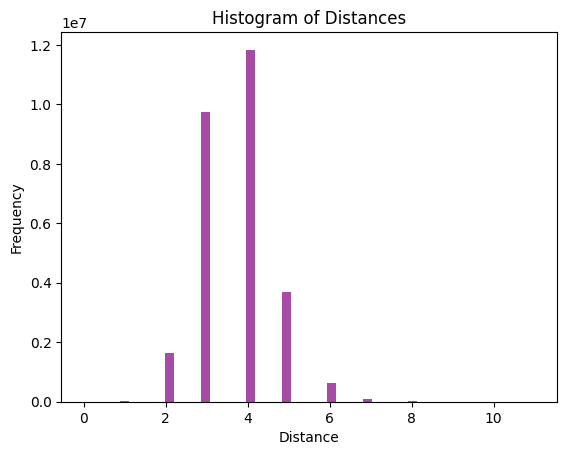

In [142]:
# Approximate distances
sampled_nodes = list(graph.nodes())
distances = []
for node in sampled_nodes:
    lengths = nx.single_source_shortest_path_length(graph, node)
    distances.extend(lengths.values())

plt.hist(distances, bins=50, color='purple', alpha=0.7)
plt.title("Histogram of Distances")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

### 5.2 Diameter and Average Distance of Bitcoin OTC Network

When determining the diameter and average distance of the graph, we need to make sure that the $\textcolor{magenta}{\text{graph is connected}}$.

- $\textcolor{teal}{\text{Diameter}}$: The diameter is defined as the longest shortest path between any two nodes in a graph. If the graph is not connected, there are pairs of nodes that are not reachable from each other, and the shortest path is undefined (infinite).
- $\textcolor{orange}{\text{Average Distance}}$: The average shortest path length is the mean of all shortest paths between nodes. In a disconnected graph, some paths are undefined, which makes the calculation invalid.

Hence, the $\textcolor{teal}{\text{diameter}}$ and $\textcolor{orange}{\text{average distance}}$ can only be computed on connected components or a connected subgraph, and that's the main reason to why we will compute the largest component and then determine both, the diameter and average distance of such component, as the complete graph is no connected.

In [143]:
# Finding connected components
connected_components = list(nx.connected_components(graph.to_undirected()))

# Obtaining the largest connected component
largest_component_nodes = max(connected_components, key=len)

# Creating the subgraph
largest_component = graph.subgraph(largest_component_nodes).copy()

# Ensuring the subgraph is connected and computing both parameters
if nx.is_connected(largest_component.to_undirected()):
    diameter = nx.diameter(largest_component.to_undirected())
    avg_distance = nx.average_shortest_path_length(largest_component.to_undirected())
    print(f"Diameter: {diameter}")
    print(f"Average Distance: {avg_distance}")
    # Computing the second moment of the degree distribution <k^2>
    degrees = [deg for node, deg in largest_component.degree()]
    second_moment = sum(d**2 for d in degrees) / len(degrees)
    print(f"Second Moment <k^2>: {second_moment}")
    
else:
    print("The selected subgraph is not connected.")

Diameter: 9
Average Distance: 3.5710878230065415
Second Moment <k^2>: 1614.7101276595745


### 5.3 Histogram of Distance, Diameter and Average Distance of Random Graphs (Type 1 and 2) 

#### 5.3.1 Type 1

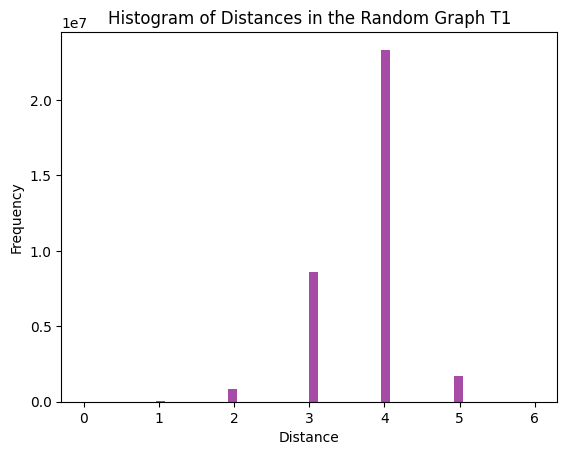

In [144]:
# Approximate distances
sampled_nodes_p = list(random_graph_p.nodes())
distances_p = []
for node in sampled_nodes_p:
    lengths_p = nx.single_source_shortest_path_length(random_graph_p, node)
    distances_p.extend(lengths_p.values())

# Plot histogram
plt.hist(distances_p, bins=50, color='purple', alpha=0.7)
plt.title("Histogram of Distances in the Random Graph T1")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

In [162]:
# Finding connected components
connected_components_p = list(nx.connected_components(random_graph_p.to_undirected()))

# Obtaining the largest connected component
largest_component_nodes_p = max(connected_components_p, key=len)

# Creating the subgraph
largest_component_p = random_graph_p.subgraph(largest_component_nodes_p).copy()

# Ensuring the subgraph is connected and computing both parameters
if nx.is_connected(largest_component_p.to_undirected()):
    diameter_p = nx.diameter(largest_component_p.to_undirected())
    avg_distance_p = nx.average_shortest_path_length(largest_component_p.to_undirected())
    print(f"Diameter: {diameter_p}")
    print(f"Average Distance: {avg_distance_p}")
else:
    print("The selected subgraph is not connected.")

Diameter: 6
Average Distance: 3.7456469409732946


#### 5.3.2 Type 2

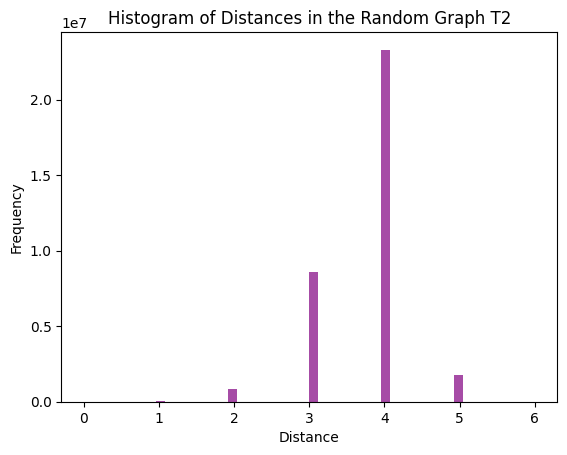

In [146]:
# Approximate distances
sampled_nodes_L = list(random_graph_L.nodes())
distances_L = []
for node in sampled_nodes_L:
    lengths_L = nx.single_source_shortest_path_length(random_graph_L, node)
    distances_L.extend(lengths_L.values())

# Plot histogram
plt.hist(distances_L, bins=50, color='purple', alpha=0.7)
plt.title("Histogram of Distances in the Random Graph T2")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

In [147]:
# Finding connected components
connected_components_L = list(nx.connected_components(random_graph_L.to_undirected()))

# Obtaining the largest connected component
largest_component_nodes_L = max(connected_components_L, key=len)

# Creating the subgraph
largest_component_L = random_graph_L.subgraph(largest_component_nodes_L).copy()

# Ensuring the subgraph is connected and computing both parameters
if nx.is_connected(largest_component_L.to_undirected()):
    diameter_L = nx.diameter(largest_component_L.to_undirected())
    avg_distance_L = nx.average_shortest_path_length(largest_component_L.to_undirected())
    print(f"Diameter: {diameter_L}")
    print(f"Average Distance: {avg_distance_L}")
else:
    print("The selected subgraph is not connected.")

Diameter: 6
Average Distance: 3.7480290500828795


### 5.4 Discussion of results

As previously, let's compare the three histograms showing the **distance distribution** across the $\textcolor{lime}{\text{Bitcoin OTC network}}$ and the two $\textcolor{cyan}{\text{random graph models G(N, p)}}$ and $\textcolor{cyan}{\text{G(N, L)}}$:

#### 1. $\textcolor{lime}{\text{Bitcoin OTC Network}}$:
   
The obtained diameter is $9$ and the average distance $3.571$. The histogram shows that the distances in the $\textcolor{lime}{\text{Bitcoin OTC network}}$ are mostly clustered around a few values (mainly 3 and 4). This suggests that most nodes are relatively close to each other, with a few nodes having longer distances ($5$, $6$ and even $8$). The **low average distance** (3.571) indicates that the network is **well-connected** for a scale-free structure as well as a $\textbf{small diameter}$.
   - The $\textcolor{blue}{\text{power-law degree distribution}}$ seen earlier (with a scaling exponent near 3) contributes to this $\textcolor{orange}{\text{small-world property}}$, where most nodes can be reached in a small number of hops despite the scale-free nature of the network. In fact, we would include this network in the $\textcolor{orange}{\text{Small-World Regime}}$ as we have that $N = 5881$, $\langle d \rangle \approx 3.571$, $\langle k \rangle \approx 12.10$ and the second moment for the largest component is $\langle k^{2} \rangle \approx 1614.71$  :
   $$
      \langle d \rangle \approx \frac{ln(N)}{ln(\langle k \rangle)} \longleftrightarrow 3.571 \approx 3.492 
   $$
   <figure>
      <center><img title="Power-Law Regimes" alt="Alt text" src="/Users/pablomollacharlez/Desktop/M2_DS/Power_Law_Regimes.png" width="500" height="500"/><center>
   <figure>


#### 2. $\textcolor{cyan}{\text{Erdős–Rényi Graph (G(N, p))} (T1)}$ and $\textcolor{cyan}{\text{Random Graph with L Edges (G(N, L)) (T2)}}$:

The histograms for these two $\textcolor{cyan}{\text{random networks}}$ show a more uniform distribution of distances. Both models represent random graphs, and their structure is vastly different from the $\textcolor{lime}{\text{Bitcoin OTC network's}}$ scale-free ($\textcolor{blue}{\text{power-law}}$) structure. Random graphs typically exhibit a more homogenous structure, and as a result, the distribution of distances is less skewed.
   - **Diameter and Average Distance**: Both random networks have a similar diameter (6) and average distance (around 3.75). These values suggest that random graphs, while still relatively efficient in connecting nodes, tend to have more paths that are moderately long compared to scale-free networks. The random edges do not form the tight-knit clusters that scale-free networks like $\textcolor{lime}{\text{Bitcoin OTC}}$ have, which is reflected in the slightly higher average distance.
   - **Small-World Effect**: While the random networks are still in the small-world regime, their structure leads to more uniformly distributed distances, as seen in the histograms. The fact that the diameters for both random networks are relatively small (6) compared to the Bitcoin network's diameter (9) suggests that random graphs tend to have more "shortcut" edges between nodes compared to the $\textcolor{lime}{\text{Bitcoin OTC network}}$.


#### 3. $\textcolor{orange}{\text{Frequency of Distance}}$: 

We also need to point out the difference in the frequency of distances between the $\textcolor{lime}{\text{Bitcoin OTC Network}}$ and the $\textcolor{cyan}{\text{two random graphs}}$.

- In the $\textcolor{lime}{\text{Bitcoin OTC Network}}$, the **frequency of distances** around **3-4** is relatively low (around 1.2). This indicates that, even in a scale-free network, the **average distance** between most nodes is small, which is typical of **small-world** networks where most nodes are within a few hops of each other.
  
- In the $\textcolor{cyan}{\text{Erdős–Rényi (G(N, p))}}$ and $\textcolor{cyan}{\text{Random Graph with L Edges (G(N, L))}}$, the **frequency of distances around 4** is significantly higher, above **2**, compared to the $\textcolor{lime}{\text{Bitcoin network}}$. This suggests that in these **random graph models**, the network's distances are more spread out, with more nodes being **further apart** (around 4 hops). This is typical of **randomly connected graphs** where node pairs can have longer distances due to the lack of a highly connected structure like that in small-world or scale-free networks.

In summary, the Bitcoin OTC network tends to have **shorter distances** and is more **well-connected**, while the random graphs show **same distances with a higher proportions of nodes**, indicating a **less efficient network structure** for node connectivity.

## $\textcolor{teal}{\text{Question 6}}$: Analyze the degree correlations of the graph. $\textcolor{lime}{\checkmark}$

### 6.1 Degree Correlation

In [148]:
# Degree correlation
degree_corr = nx.degree_assortativity_coefficient(graph)
print(f"Degree Correlation Coefficient: {degree_corr}")

Degree Correlation Coefficient: -0.16395371492959188


### 6.2 Degree Correlation Visualization

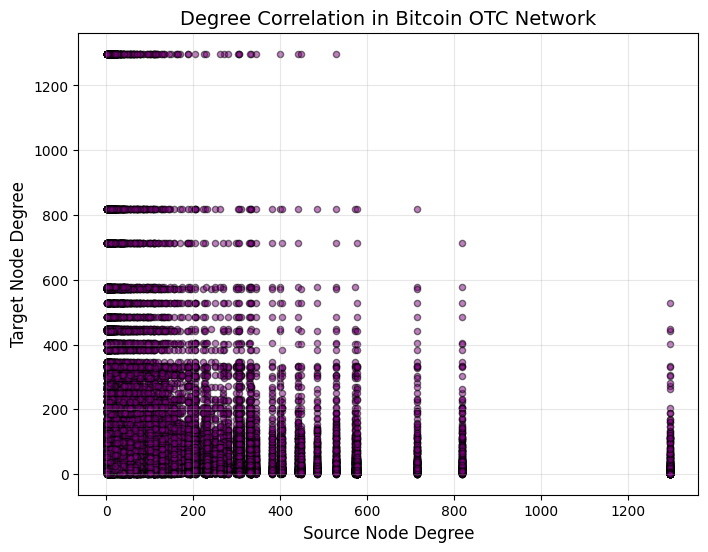

In [149]:
# Compute the degrees of nodes
degrees = dict(graph.degree())
node_degrees = list(degrees.values())

# Extract source-target degrees for edges
edges = list(graph.edges())
source_degrees = [degrees[edge[0]] for edge in edges]
target_degrees = [degrees[edge[1]] for edge in edges]

# Plot the correlation between source and target node degrees
plt.figure(figsize=(8, 6))
plt.scatter(source_degrees, target_degrees, alpha=0.5, color='purple', edgecolor='k', s=20)
plt.title("Degree Correlation in Bitcoin OTC Network", fontsize=14)
plt.xlabel("Source Node Degree", fontsize=12)
plt.ylabel("Target Node Degree", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

### 6.3 Discussion of results


The negative value ($-0.16$) suggests that the Bitcoin OTC network is $\textcolor{cyan}{\text{disassortative}}$. In this context, it indicates that $\textcolor{cyan}{\text{nodes with high degrees}}$ ($\textcolor{lime}{\text{highly trusted users}}$) $\textcolor{cyan}{\text{are more likely to connect with nodes with low degrees}}$ ($\textcolor{lime}{\text{users with fewer trust relationships}}$). This $\textcolor{cyan}{\text{disassortative}}$ mixing could reflect a trust structure where a small number of highly reputable users are relied upon by many less-connected users, typical in hierarchical or reputation-based systems.

This result implies as well that the network's resilience is based on these hubs that play a key role in connecting the network. $\textcolor{red}{\text{If these hubs fail or leave the system}}$, $\textcolor{red}{\text{the network's connectivity may be significantly affected}}$. The structure suggests that less-connected or newer users tend to establish trust relationships with highly connected users who are likely considered trustworthy or central to the network.
As we have seen in the lecture, $\textcolor{cyan}{\text{disassortative}}$ networks can be robust against random failures, however they are vulnerable to $\textcolor{red}{\text{targeted attacks}}$ on hubs.



## $\textcolor{teal}{\text{Question 7}}$: Detect the communities in the graph, and discuss the results. $\textcolor{lime}{\checkmark}$

### 7.1 Single-Community Detection 

The first visualization we are using only highlights a $\textcolor{orange}{\text{single community}}$, and all the nodes are depicted in one $\textcolor{blue}{\text{color}}$. While it effectively showcases the connections within that specific community, it fails to give an overview of all communities involved in the graph, therefore in the upcoming subsection we will visualize all the different communities, although the visibility of such becomes complicated.

Number of Communities: 59


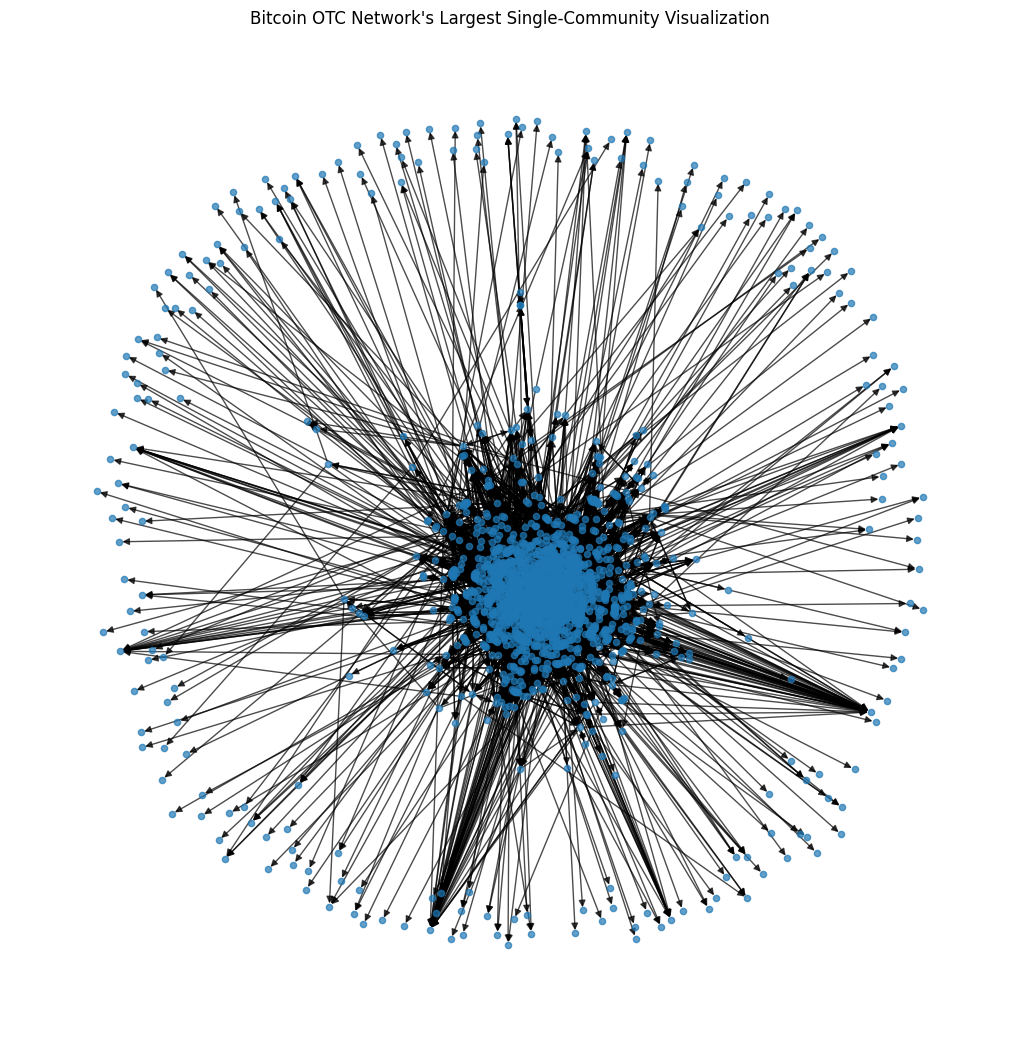

In [150]:
from networkx.algorithms.community import greedy_modularity_communities

# Detect communities using greedy modularity
communities = list(greedy_modularity_communities(graph))
print(f"Number of Communities: {len(communities)}")

# Visualize a sample community
community_subgraph = graph.subgraph(communities[0])
plt.figure(figsize=(10, 10))
nx.draw(community_subgraph, with_labels=False, node_size=20, alpha=0.7)
plt.title("Bitcoin OTC Network's Largest Single-Community Visualization")
plt.show()

### 7.2 Discussion  of results

As we can observe, there is a high density in the core of the graph visualization, indicating that the $\textcolor{teal}{\text{core of the graph is densely connected}}$, suggesting a group of highly interactive or trusted users. In terms of $\textcolor{teal}{\text{peripheral nodes}}$, we notice less that $\textcolor{teal}{\text{nodes are less connected}}$, possibly representing users with fewer interactions or trust connections.

### 7.3 Visualization of Communities


/var/folders/k2/cgpb1jbn1rn8tqttl65m7xcr0000gn/T/ipykernel_61536/1400873857.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab20', len(communities))  # Use tab20 for distinct colors


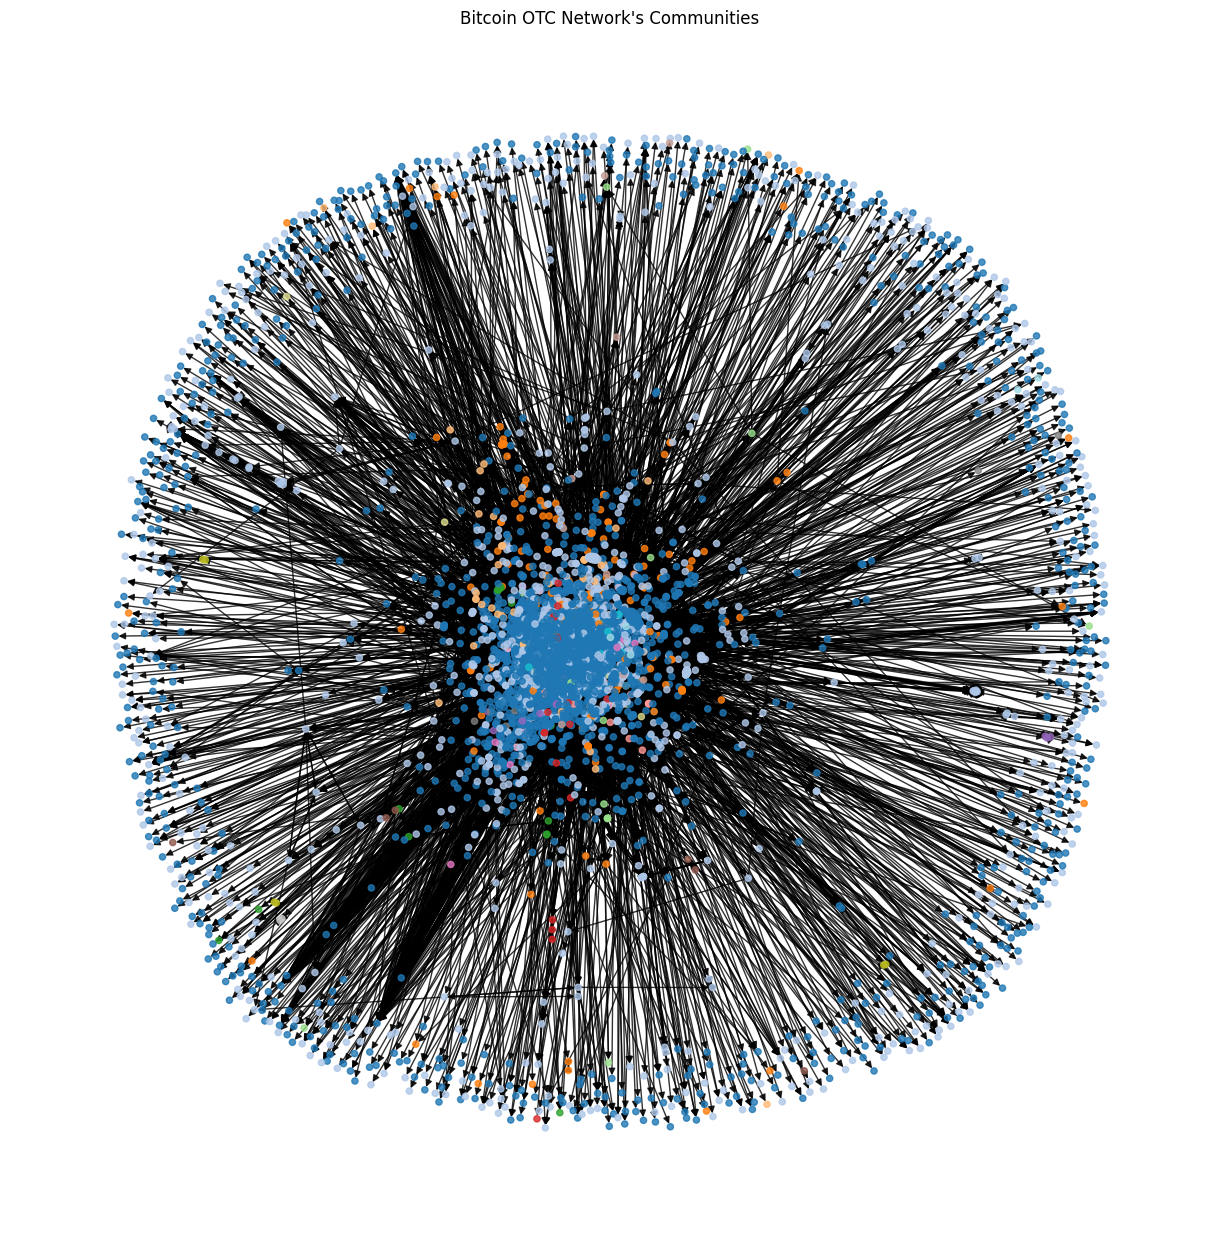

In [151]:
from matplotlib import cm
from networkx import spring_layout

# Assign colors to communities
color_map = cm.get_cmap('tab20', len(communities))  # Use tab20 for distinct colors
node_colors = {}
for i, community in enumerate(communities):
    for node in community:
        node_colors[node] = color_map(i)

# Create node colors list
node_color_list = [node_colors[node] for node in graph.nodes()]

# Draw the graph
plt.figure(figsize=(12, 12))
pos = spring_layout(graph)
nx.draw(
    graph, pos, node_color=node_color_list, with_labels=False, node_size=20, alpha=0.8
)
plt.title("Bitcoin OTC Network's Communities")
plt.show()


### 7.2 Discussion of results

Compared to the previous ($\textcolor{orange}{\text{single-community visualization}}$), this $\textcolor{magenta}{\text{representation highlights different communities}}$ within the $\textcolor{lime}{\text{Bitcoin OTC network}}$, with nodes colored according to their community membership. We will discuss the following features:

- $\textcolor{teal}{\textbf{Core Community (Largest Cluster)}}$: The $\textcolor{cyan}{\text{densely packed blue cluster at the center}}$ represents the largest community, just like in the $\textcolor{orange}{\text{single-community visualization}}$. This likely includes highly interconnected nodes, representing users who trust and transact with each other frequently. Its dominance suggests that a majority of users are part of a central, tightly knit group within the network, indicating $\textcolor{cyan}{\text{strong trust relationships among these members}}$.

- $\textcolor{teal}{\textbf{Peripheral Communities}}$: The smaller, scattered nodes with varying colors represent $\textcolor{magenta}{\text{smaller communities or subgroups}}$. These communities may consist of users who trust only a specific subset of people or have limited interactions within the network. These smaller groups are more sparsely connected to the larger community, possibly indicating isolated or niche groups of traders.

- $\textcolor{teal}{\textbf{Edge Density}}$: The many black edges connecting nodes, especially in the center, signify high interaction and trust ratings between users in the largest community. Sparse edges on the periphery highlight lower interaction levels among users in smaller communities or with the central cluster.

- $\textcolor{teal}{\textbf{Structural Insights}}$: The network appears scale-free which confirms or follows the assumptions we have, with a highly connected core and many loosely connected peripheral nodes. This is typical in social and trust networks, where a small number of users act as hubs, connecting the broader user base.

## $\textcolor{teal}{\text{Question 8}}$: Do a comparative analysis of your social dataset and a non-social one. $\textcolor{lime}{\checkmark}$

### Dataset Explanation: EUROROAD (European Road Networks)

$\textbf{Dataset URL}$: [EUROROAD](https://networkrepository.com/road-euroroad.php)

$\textcolor{blue}{\text{EuroRoadS}}$ is a project aimed at establishing a standardized, interoperable digital road data infrastructure across Europe. The project addresses the $\textcolor{red}{\text{current fragmentation in road data handling}}$, where $\textcolor{red}{\text{national road administrations and mapping agencies manage separate road information systems}}$, often with differing standards and no unified access to data across borders. This lack of harmonization results in inefficiencies and high costs for commercial actors, who must independently gather and update road data.

$\textcolor{blue}{\text{EuroRoadS seeks to create a consistent and quality-assured road database}}$ that can be used by various sectors, including traffic management, intelligent transport systems, and navigation services. By improving access to up-to-date road data, it aims to foster economic and technological growth, particularly in areas like $\textcolor{teal}{\text{GPS-based tools}}$, $\textcolor{teal}{\text{vehicle tracking}}$, and $\textcolor{teal}{\text{in-car navigation systems}}$. The project's goal is to make road data freely available and continuously updated, facilitating $\textcolor{teal}{\text{better planning}}$, $\textcolor{teal}{\text{efficiency}}$, and $\textcolor{teal}{\text{safety across European transport systems}}$.

### 8.1 Data Loading & Graph Creation

In [167]:
import networkx as nx

# Load the graph from the .edges file
graph_euroroads = nx.read_edgelist('/Users/pablomollacharlez/Desktop/M2_DS/road-euroroad.edges')


### 8.2 Graph Creation + Basic Information

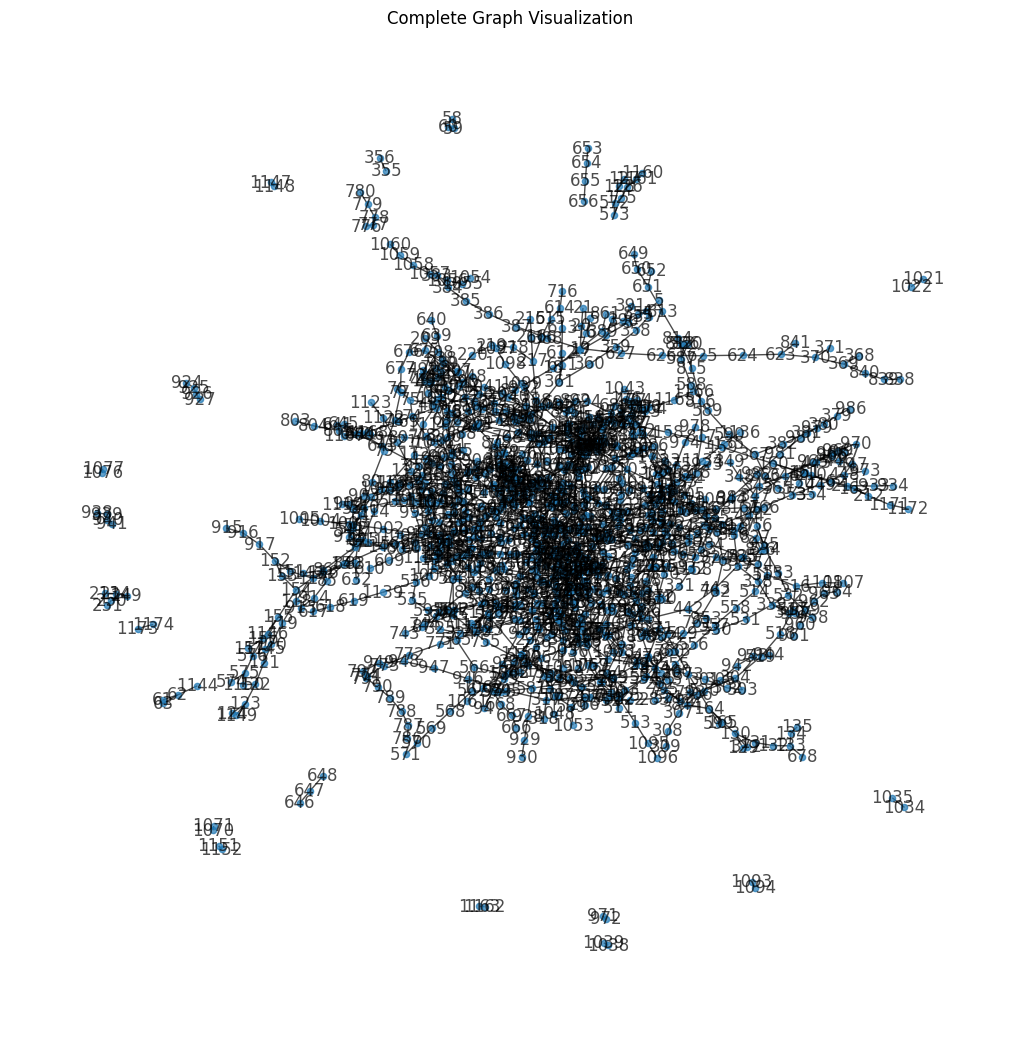

Number of nodes: 1174
Number of edges: 1417


In [168]:
plt.figure(figsize=(10, 10))
nx.draw(graph_euroroads, with_labels=True, node_size=20, alpha=0.7)
plt.title("Complete Graph Visualization")
plt.show()

# Printing basic statistics: Number of Nodes + Edges
print(f"Number of nodes: {graph_euroroads.number_of_nodes()}")
print(f"Number of edges: {graph_euroroads.number_of_edges()}")

### 8.3 Histogram of Degrees of EuroRoads

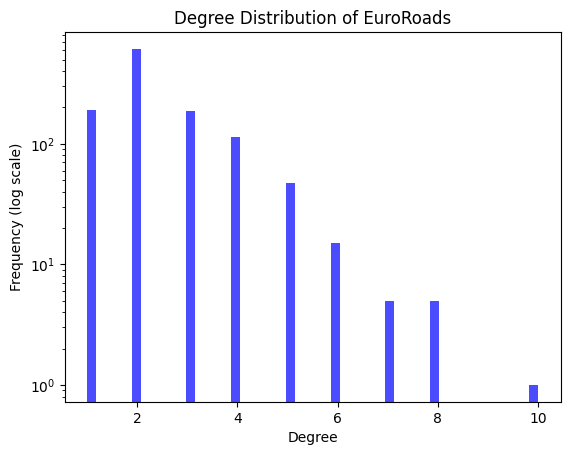

In [169]:
# Degree histogram
degrees_euroroads = [deg for _, deg in graph_euroroads.degree()]
plt.hist(degrees_euroroads, bins=50, log=True, color='blue', alpha=0.7)
plt.title('Degree Distribution of EuroRoads')
plt.xlabel('Degree')
plt.ylabel('Frequency (log scale)')
plt.show()

### 8.4 Histogram of Clustering Coefficientof EuroRoads

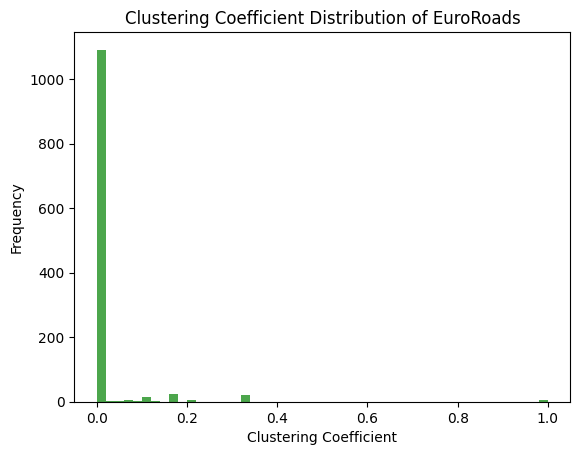

In [170]:
# Clustering coefficient
clustering_coeffs_euroroads = list(nx.clustering(graph_euroroads).values())
plt.hist(clustering_coeffs_euroroads, bins=50, color='green', alpha=0.7)
plt.title("Clustering Coefficient Distribution of EuroRoads")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.show()

#### 8.4.1 Average Clustering Coefficient of EuroRoads

In [171]:
# Average clustering coefficient
avg_clustering_euroroads = nx.average_clustering(graph_euroroads)
print(f"Average Clustering Coefficient EuroRoads: {avg_clustering_euroroads}")

Average Clustering Coefficient EuroRoads: 0.016731564857629593


### 8.5 Histogram of Distances of EuroRoads

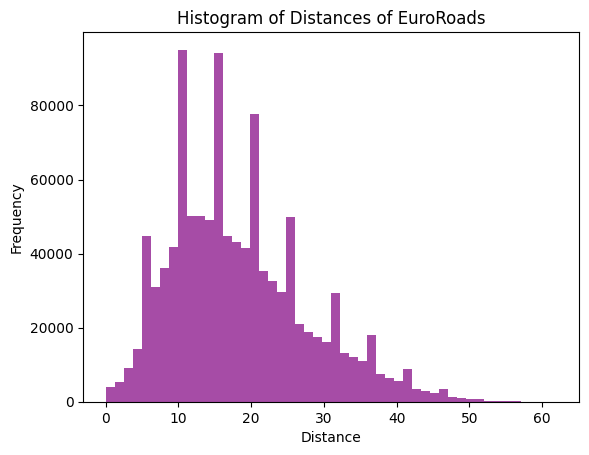

In [172]:
# Approximate distances
sampled_nodes_e = list(graph_euroroads.nodes())
distances_e = []
for node in sampled_nodes_e:
    lengths_e = nx.single_source_shortest_path_length(graph_euroroads, node)
    distances_e.extend(lengths_e.values())

plt.hist(distances_e, bins=50, color='purple', alpha=0.7)
plt.title("Histogram of Distances of EuroRoads")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

#### 8.5.1 Diameter and Average Distance of EuroRoads

In [195]:
# Finding connected components
connected_components_e = list(nx.connected_components(graph_euroroads.to_undirected()))

# Obtaining the largest connected component
largest_component_nodes_e = max(connected_components_e, key=len)

# Creating the subgraph
largest_component_e = graph_euroroads.subgraph(largest_component_nodes_e).copy()

# Ensuring the subgraph is connected and computing both parameters
if nx.is_connected(largest_component_e.to_undirected()):
    diameter_e = nx.diameter(largest_component_e.to_undirected())
    avg_distance_e = nx.average_shortest_path_length(largest_component_e.to_undirected())
    print(f"Diameter: {diameter_e}")
    print(f"Average Distance: {avg_distance_e}")
    # Computing the second moment of the degree distribution <k^2>
    degrees_e = [deg for node, deg in largest_component_e.degree()]
    print("First Moment <k>:", sum(d for d in degrees_e) / len(degrees_e))
    second_moment_e = sum(d**2 for d in degrees_e) / len(degrees_e)
    print(f"Second Moment <k^2>: {second_moment_e}")
    
else:
    print("The selected subgraph is not connected.")

Diameter: 62
Average Distance: 18.39514614059391
First Moment <k>: 2.512030798845043
Second Moment <k^2>: 7.753609239653513


### 8.6 Degree Correlation of EuroRoads

In [174]:
# Degree correlation
degree_corr_e = nx.degree_assortativity_coefficient(graph_euroroads)
print(f"Degree Correlation Coefficient: {degree_corr_e}")

Degree Correlation Coefficient: 0.12668357398536234


#### 8.6.1 Degree Correlation's Visualization

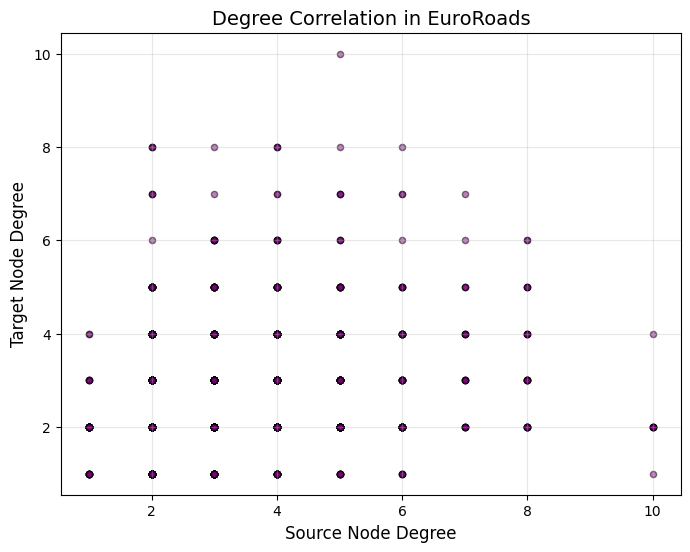

In [175]:
# Compute the degrees of nodes
degrees_e = dict(graph_euroroads.degree())
node_degrees_e = list(degrees_e.values())

# Extract source-target degrees for edges
edges_e = list(graph_euroroads.edges())
source_degrees_e = [degrees_e[edge[0]] for edge in edges_e]
target_degrees_e = [degrees_e[edge[1]] for edge in edges_e]

# Plot the correlation between source and target node degrees
plt.figure(figsize=(8, 6))
plt.scatter(source_degrees_e, target_degrees_e, alpha=0.5, color='purple', edgecolor='k', s=20)
plt.title("Degree Correlation in EuroRoads", fontsize=14)
plt.xlabel("Source Node Degree", fontsize=12)
plt.ylabel("Target Node Degree", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

### 8.7 Communities

#### 8.7.1 Single-Community Detection 

Number of Communities: 48


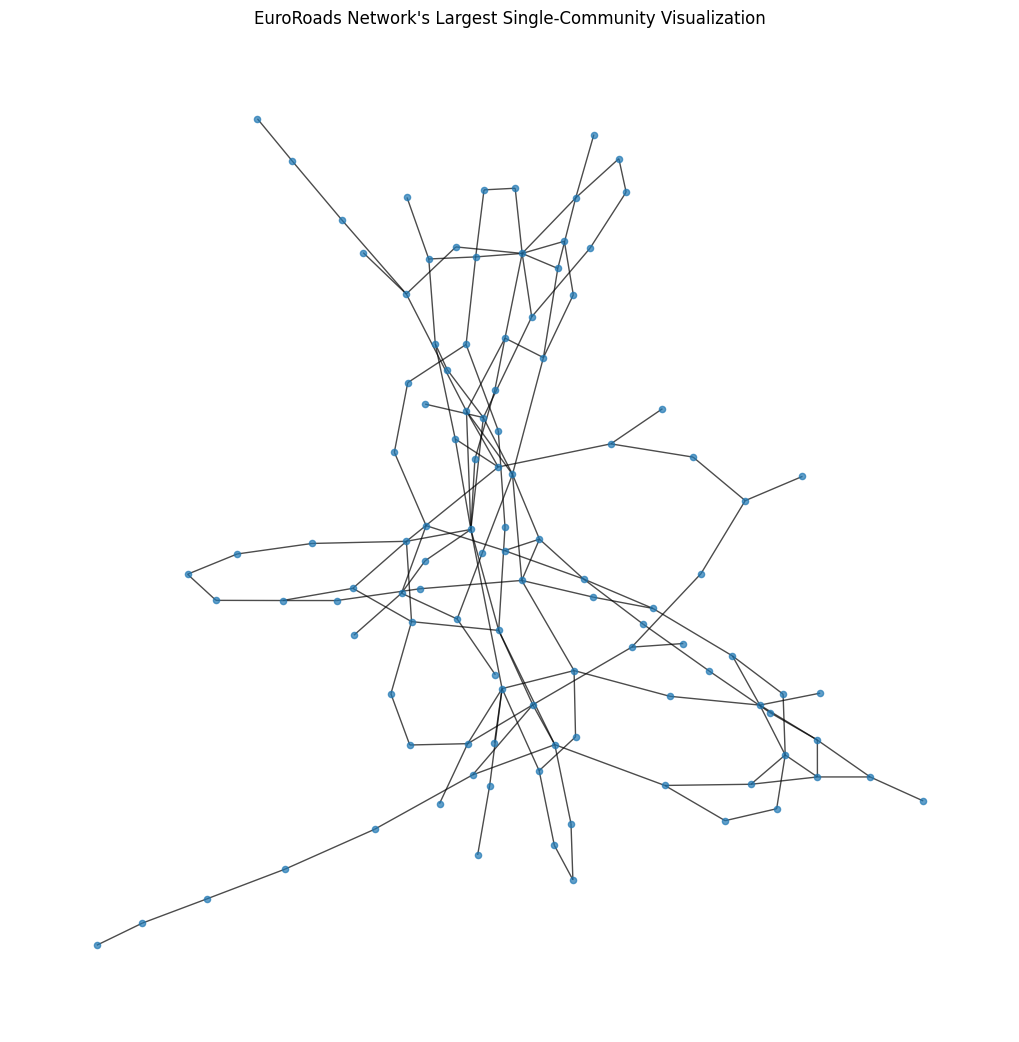

In [176]:
from networkx.algorithms.community import greedy_modularity_communities

# Detect communities using greedy modularity
communities_e = list(greedy_modularity_communities(graph_euroroads))
print(f"Number of Communities: {len(communities_e)}")

# Visualize a sample community
community_subgraph_e = graph_euroroads.subgraph(communities_e[0])
plt.figure(figsize=(10, 10))
nx.draw(community_subgraph_e, with_labels=False, node_size=20, alpha=0.7)
plt.title("EuroRoads Network's Largest Single-Community Visualization")
plt.show()

#### 8.7.2 Communities Detection 

/var/folders/k2/cgpb1jbn1rn8tqttl65m7xcr0000gn/T/ipykernel_61536/2573546058.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab20', len(communities_e))  # Use tab20 for distinct colors


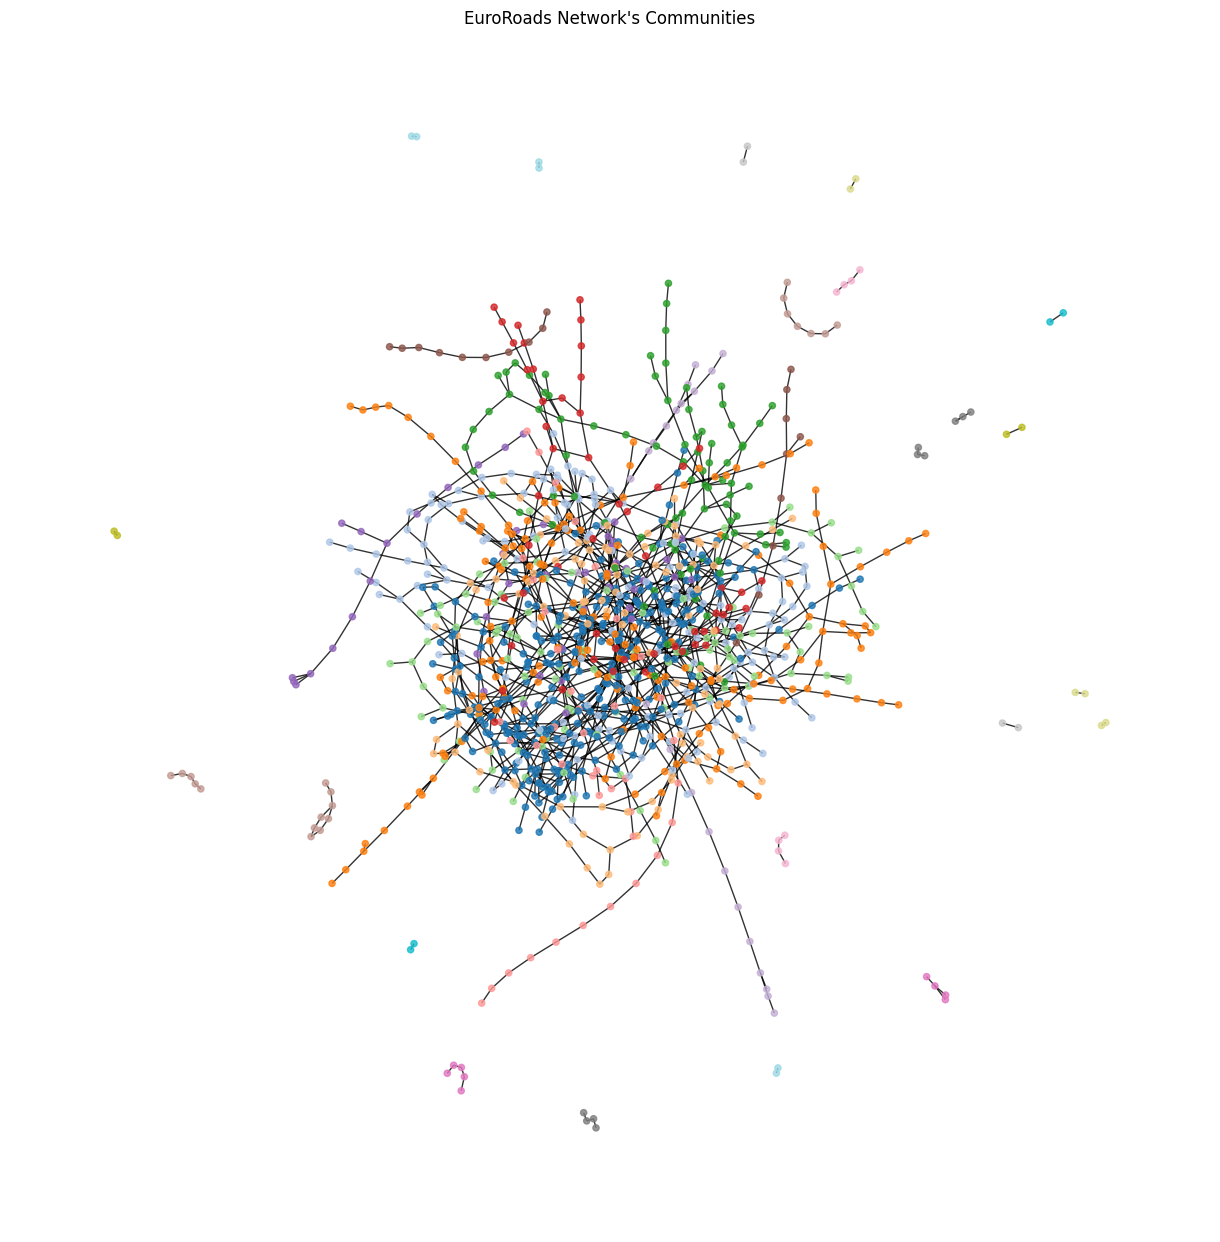

In [177]:
from matplotlib import cm
from networkx import spring_layout

# Assign colors to communities
color_map = cm.get_cmap('tab20', len(communities_e))  # Use tab20 for distinct colors
node_colors = {}
for i, community in enumerate(communities_e):
    for node in community:
        node_colors[node] = color_map(i)

# Create node colors list
node_color_list = [node_colors[node] for node in graph_euroroads.nodes()]

# Draw the graph
plt.figure(figsize=(12, 12))
pos = spring_layout(graph_euroroads)
nx.draw(
    graph_euroroads, pos, node_color=node_color_list, with_labels=False, node_size=20, alpha=0.8
)
plt.title("EuroRoads Network's Communities")
plt.show()


### 8.8 Discussion

The $\textcolor{blue}{\text{EuroRoads network}}$, with $1174$ nodes and $1417$ edges, presents a different structural organization compared to the $\textcolor{lime}{\text{Bitcoin OTC network}}$, which has $5881$ nodes and $35592$ edges and a more scale-free degree distribution. Let's discuss the key features:

1. **Degree Distribution**:
   - $\textcolor{lime}{\text{Bitcoin OTC Network}}$: The degree distribution of $\textcolor{lime}{\text{Bitcoin OTC}}$ follows a **power-law** distribution, which is a characteristic of scale-free networks. This means that a few nodes have very high degrees, while most nodes have low degrees. This kind of distribution is typical for real-world networks such as social and web networks.
   - $\textcolor{blue}{\text{EuroRoads Network}}$: The degree distribution for $\textcolor{blue}{\text{EuroRoads}}$ appears more **uniform**, with a slight trend of diminishing frequency as the degree increases. The highest frequencies appear at degree 1, 2, and 3, with a slow decay for higher degrees. Unlike $\textcolor{lime}{\text{Bitcoin OTC's}}$ clear power law, EuroRoads’ distribution suggests a less centralized network where nodes are more uniformly connected.

2. **Clustering Coefficient**:
   - $\textcolor{lime}{\text{Bitcoin OTC Network}}$: The clustering coefficient in the $\textcolor{lime}{\text{Bitcoin OTC network}}$ is quite low ($0.151$), indicating relatively sparse clustering where most nodes do not form tight local neighborhoods, however some nodes with clustering coefficients closer to 1, indicate the presence of **highly connected neighborhoods**.
   - $\textcolor{blue}{\text{EuroRoads Network}}$: The clustering coefficient distribution shows a peak at **0**, which suggests that the majority of nodes in the $\textcolor{blue}{\text{EuroRoads network}}$ have little to no clustering. The **average clustering coefficient** is 0.0167, indicating that the $\textcolor{blue}{\text{EuroRoads network}}$ has a very sparse clustering structure. This is in clear contrast to many real-world social networks, where higher clustering is often seen. Still, the low clustering in $\textcolor{blue}{\text{EuroRoads}}$ could be due to the kind of network it represents as an infrastructure network, where tight communities may be less frequent than in social networks.

3. **Distance Distribution**:
   - $\textcolor{lime}{\text{Bitcoin OTC Network}}$: The distance distribution in Bitcoin OTC shows that the network is relatively small-world, with a small diameter (9) and average distance (around 3.57), which is typical for social networks. The small-world phenomenon allows for short paths between any two nodes, making the network robust and efficient in terms of communication.
   - $\textcolor{blue}{\text{EuroRoads Network}}$: In comparison, the EuroRoads network has a much larger **diameter** of **62** and an **average distance** of **18.40**, reflecting a network that is less tightly connected. The longer average distance suggests that, on average, it takes more steps to reach from one node to another in EuroRoads. This is likely due to the nature of the road network, where nodes (cities or regions) are distributed over a larger geographical area, and not all nodes are in close proximity.

4. **Second Moment of Degree Distribution**:
   - $\textcolor{lime}{\text{Bitcoin OTC Network}}$: The second moment of degree distribution for the Bitcoin OTC network (which is large, around **1614**) suggests a very skewed degree distribution, with some nodes having extremely high degrees, contributing significantly to the variance.
   - $\textcolor{blue}{\text{EuroRoads Network}}$: The second moment for $\textcolor{blue}{\text{EuroRoads}}$ is much smaller (**7.75**), consistent with the more uniform degree distribution observed in the degree histogram. This implies that the $\textcolor{blue}{\text{EuroRoads network}}$ has less variability in terms of node degree, and that nodes tend to have more similar degrees compared to $\textcolor{lime}{\text{Bitcoin OTC}}$. Is important to mention that the value obtained for the second moment is just from the largest component and not from the complete $\textcolor{blue}{\text{EuroRoads network}}$, as we see more fitting to compare it this way rather than cosindering the whole graph with its many $\textcolor{red}{\text{isolated nodes}}$ which would largely decrease the variance as well as the average degree of nodes.

5. **Degree Correlation**:
   - $\textcolor{lime}{\text{Bitcoin OTC Network}}$: $\textcolor{lime}{\text{Bitcoin OTC}}$ exhibited a degree correlation characteristic of a **disassortative network**, meaning high-degree nodes are likely to be connected to low-degree nodes, which is common in social networks where influential users (or in our scenario, highly trusted Bitcoin trade users) are connected to a variety of less influential users.
   - $\textcolor{blue}{\text{EuroRoads Network}}$: The $\textcolor{blue}{\text{EuroRoads network}}$ shows a **positive degree correlation** of **0.1267**, indicating that nodes with high degrees tend to be connected to other high-degree nodes. This suggests a more **assortative network**, which could be reflective of transportation networks, where major cities or hubs tend to be connected to other major cities or hubs.

6. **Community Structure**:
   - $\textcolor{lime}{\text{Bitcoin OTC Network}}$: $\textcolor{lime}{\text{Bitcoin OTC network}}$ has a core community which is the densely packed central cluster, representing a group of highly interconnected users with strong trust relationships. Peripheral communities are more scattered, with sparse connections to the core. This scale-free structure highlights a small number of hub users connecting a majority of others.
   - $\textcolor{blue}{\text{EuroRoads Network}}$: The community structure in $\textcolor{blue}{\text{EuroRoads}}$ is more pronounced, with visible **separated clusters**. These communities likely correspond to regions or subnets of cities or geographical areas, which is typical in transportation networks. These communities are highly connected internally but sparsely connected between clusters, indicating a more structured and regionalized network typical of transportation systems.

Summary:

In summary, the $\textcolor{blue}{\text{EuroRoads network}}$ is more **sparse** and **geographically distributed** compared to the $\textcolor{lime}{\text{Bitcoin OTC network}}$. The $\textcolor{lime}{\text{Bitcoin OTC network's}}$ **scale-free** nature (with power-law degree distribution) suggests a network where a small number of highly connected nodes (trusted users) play a significant role, while the $\textcolor{blue}{\text{EuroRoads network’s}}$ more uniform degree distribution and sparse clustering reflect a more decentralized structure. Additionally, the **larger diameter** and **longer average distance** in $\textcolor{blue}{\text{EuroRoads}}$ suggest a less efficient connectivity compared to the $\textcolor{lime}{\text{Bitcoin OTC network}}$, which $\textcolor{purple}{\text{benefits from the small-world property}}$ and shorter path lengths typical of social networks.

## $\textcolor{teal}{\text{Question 9}}$: Other comparisons or analysis that you may find interesting. $\textcolor{lime}{\checkmark}$

### 9.1 Robustness under Random and Targeted Attacks

In this study, we aim to investigate the robustness of the $\textcolor{lime}{\text{Bitcoin OTC network}}$ and the $\textcolor{blue}{\text{EuroRoads network}}$ under both **random** and **targeted attacks**. To measure the networks' resilience to node removal, we apply the **Molloy-Reed criterion**, which provides a threshold for when a network begins to fragment as we studied in lecture. The $\textcolor{orange}{\text{Molloy-Reed criterion}}$ for the existence of a giant component in a network is given by:
$$
    \kappa = \frac{\langle k^2 \rangle}{\langle k \rangle} > 2
$$
Where:
- $\langle k \rangle$ is the average degree of the network.
- $\langle k^2 \rangle$ is the second moment of the degree distribution.

The critical fraction $f_c$ of nodes that need to be removed to destroy the giant component is calculated as:
$$
    f_c = 1 - \frac{1}{\kappa - 1}
$$
For the upcoming implementation, we will use the following threshold (derived from the critical fraction formula):
$$
    \text{Threshold} = \frac{1}{\kappa - 1} = \frac{1}{\frac{\langle k^{2} \rangle}{\langle k \rangle} - 1}
$$
However, we encountered an issue with the $\textcolor{orange}{\text{Molloy-Reed}}$ threshold for the $\textcolor{blue}{\text{EuroRoads network}}$. Upon computing the variance ($1.412$) and the mean degree ($2.413$), we obtained a negative value for $\kappa$. This led to a negative value for the critical fraction, which is not valid. As a result, we had to assign a **default value** (1.0) to the $\textcolor{orange}{\text{Molloy-Reed threshold}}$ for the $\textcolor{blue}{\text{EuroRoads network}}$ to bypass this inconvenience. This low value in terms of variance and mean comes from considering the whole $\textcolor{blue}{\text{Euroroads network}}$ instead of considering just the largest component ($7.75$) (as we discussed in the previous section $8.8$) leading to a negative threshold.


Molloy-Reed Critical Fraction for Bitcoin OTC Network: 0.008322070767095341
Molloy-Reed Critical Fraction for EuroRoads Network: 1.0


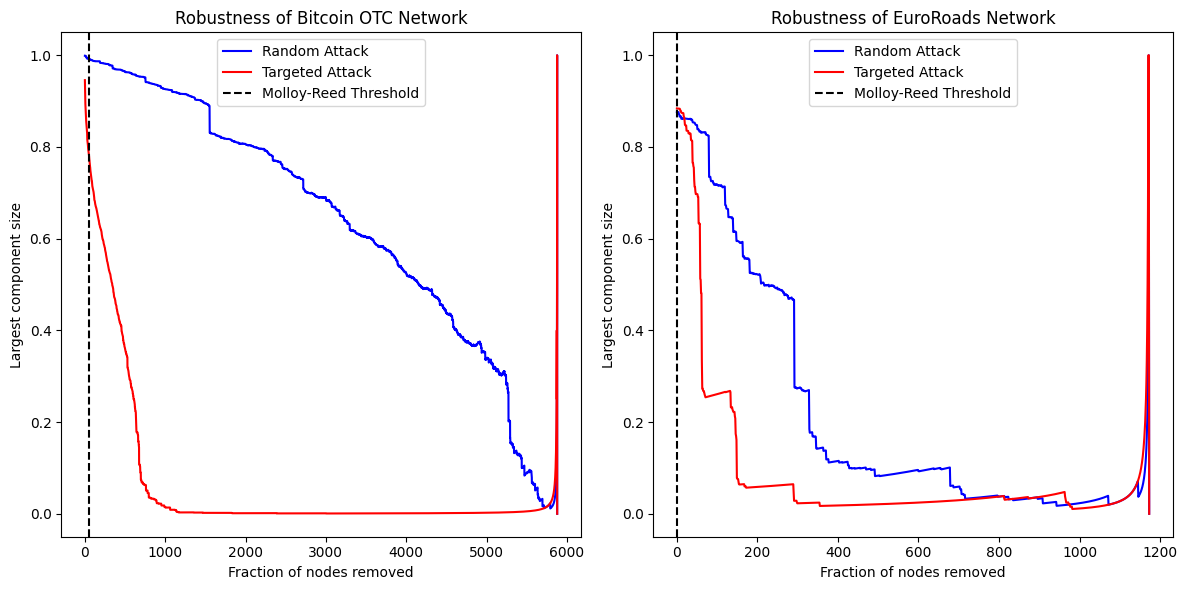

In [197]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the Molloy-Reed percolation threshold
def molloy_reed_criterion(graph):
    # Calculating the mean degree and variance of the degree distribution
    degree_sequence = [d for n, d in graph.degree()]
    mean_degree = np.mean(degree_sequence)
    variance_degree = np.var(degree_sequence)
    
    # Checking if the variance is large enough to compute a valid threshold
    if variance_degree / mean_degree - 1 <= 0:
        print(f"Warning: Invalid Molloy-Reed threshold due to low variance for Graph: {graph}")
        return 1.0  # or set a default value, or handle differently

    # Molloy-Reed threshold calculation
    threshold = 1 / (variance_degree / mean_degree - 1)
    return threshold

def network_robustness(graph, attack_type='random'):
    sizes = []
    graph_network = graph.copy()

    # Number of nodes to remove in each iteration
    nodes_to_remove = len(graph_network.nodes())  # Remove all nodes eventually

    # Simulating the 2 types of attacks
    if attack_type == 'random':
        # Random attack: remove nodes randomly
        node_order = list(graph_network.nodes())
        np.random.shuffle(node_order)
    elif attack_type == 'targeted':
        # Targeted attack: remove nodes with the highest degree
        node_order = sorted(graph_network.degree, key=lambda x: x[1], reverse=True)
        node_order = [node for node, degree in node_order]

    for i in range(nodes_to_remove):
        # Removing one node
        graph_network.remove_node(node_order[i])
        
        # Checking if there are still any connected components
        connected_components = list(nx.connected_components(graph_network.to_undirected()))
        if connected_components:  # Ensure there's at least one connected component
            largest_component = max(connected_components, key=len)
            sizes.append(len(largest_component) / len(graph_network.nodes()))
        else:
            # If no connected components remain, the network is fully fragmented
            sizes.append(0.0)
            break

    return sizes


# Molloy-Reed threshold for each network
threshold_bitcoin = molloy_reed_criterion(graph)
threshold_euroroads = molloy_reed_criterion(graph_euroroads)

print(f"Molloy-Reed Critical Fraction for Bitcoin OTC Network: {threshold_bitcoin}")
print(f"Molloy-Reed Critical Fraction for EuroRoads Network: {threshold_euroroads}")

# Simulating random and targeted attacks for both networks
sizes_bitcoin_random = network_robustness(graph.copy(), attack_type='random')
sizes_bitcoin_targeted = network_robustness(graph.copy(), attack_type='targeted')
sizes_euroroads_random = network_robustness(graph_euroroads.copy(), attack_type='random')
sizes_euroroads_targeted = network_robustness(graph_euroroads.copy(), attack_type='targeted')

# Plotting the robustness curves
plt.figure(figsize=(12, 6))

# Bitcoin OTC Network
plt.subplot(1, 2, 1)
plt.plot(sizes_bitcoin_random, label="Random Attack", color='blue')
plt.plot(sizes_bitcoin_targeted, label="Targeted Attack", color='red')
plt.axvline(x=threshold_bitcoin * len(graph.nodes()), linestyle='--', color='black', label='Molloy-Reed Threshold')
plt.title("Robustness of Bitcoin OTC Network")
plt.xlabel("Fraction of nodes removed")
plt.ylabel("Largest component size")
plt.legend()

# EuroRoads Network
plt.subplot(1, 2, 2)
plt.plot(sizes_euroroads_random, label="Random Attack", color='blue')
plt.plot(sizes_euroroads_targeted, label="Targeted Attack", color='red')
plt.axvline(x=threshold_euroroads, linestyle='--', color='black', label='Molloy-Reed Threshold')
plt.title("Robustness of EuroRoads Network")
plt.xlabel("Fraction of nodes removed")
plt.ylabel("Largest component size")
plt.legend()

plt.tight_layout()
plt.show()


### 9.2 Conclusion

Based on the results in the graph, we can conclude the following:

- $\textcolor{lime}{\text{Bitcoin OTC network}}$ shows a steep decline in the size of the largest component under targeted attacks, indicating that the network is highly vulnerable to targeted node removals, which is an expected outcome considering that the network follows a $\textcolor{purple}{\text{power-law distribution}}$. In terms of the random attacks, the $\textcolor{lime}{\text{Bitcoin OTC network}}$ showcases resilience as the largest component size does not drastically decrease.

- $\textcolor{blue}{\text{EuroRoads network}}$, on the other hand, presents results that are somewhat unexpected, although they might make sense given the size of the network(around $1200$ nodes). In theory, the network should exhibit a more gradual degradation in the largest component size when attacked under targeted removals, as the network doesn't contain many (or almost any) hubs. We believe that the main reason for these results is the cardinality of the dataset; with so few nodes, the network gets fragmented almost immediately, regardless of whether the attack is random or targeted. However, as we can see, the targeted attack destroys the robustness of the network faster.

In conclusion, while both networks experience fragmentation under node removals, the $\textcolor{lime}{\text{Bitcoin OTC network}}$ is more susceptible to rapid fragmentation, particularly under targeted attacks, while the $\textcolor{blue}{\text{EuroRoads network}}$ shows a similar fragmentation between both approaches.

#### Prompts used with ChatGPT:

1. I want to have the 2 possible types of random graphs: 
    1. the random graph generated by N nodes with probability p determined by p = average degree of nodes / (N-1) where n is the number of nodes (so you need to compute the average degree)
    2. random graph with N nodes and exactly L edges where L is chosen uniformly at random and for both, I would like to draw them, limiting the nodes to 1000 nodes

2. How can I find a sufficient large subgraph connected in order to compute the diameter, besides, why the average distance needs as requirement the subgraph to be connected

3. Propose a better way to visualise the different communities because I only see one colour

4. The community depicted is the largest one by default or it's coincidental?

5. Degree Correlation Coefficient: -0.16395371492959188 Discuss it (in terms of assortative, disassortative or neutral network type), plus could you plot a graph showing the correlation of the degree nodes?

6. Do u know what is it the euroroads?

7. Do you know if I can use python to read and extract the network from a file with format .edges?

8. When computing the average degree, should I use the largest component or the whole graph?

9. Notice (briefly) that the frequency of distances around 4 in both random graphs is above 2 compared to the frequency of distances around 3-4 in the bitcoin otc network which is around 1.2

10. I don't understand, if when using the function nx.connected_components it returns a list with a single element (meaning a single component) why such component is not connected?

11. Suggest me 2 other comparisons or analysis that might be interesting?

12. The formula you used for Molloy-Reed criterion is wrong (uploaded picture with the one from the lecture)

13. Is it possible that I obtain a negative value for the threshold?

14. Which should be the right default value in case of negative threshold?

